In [1]:
import cv2 #opencv
import numpy as np #useful for manipulating image arrays
import matplotlib.pyplot as plt #needed for plotting (within Jupyter)
#these allows for images to be shown
# from PIL import Image  
from IPython.display import Image
%matplotlib inline

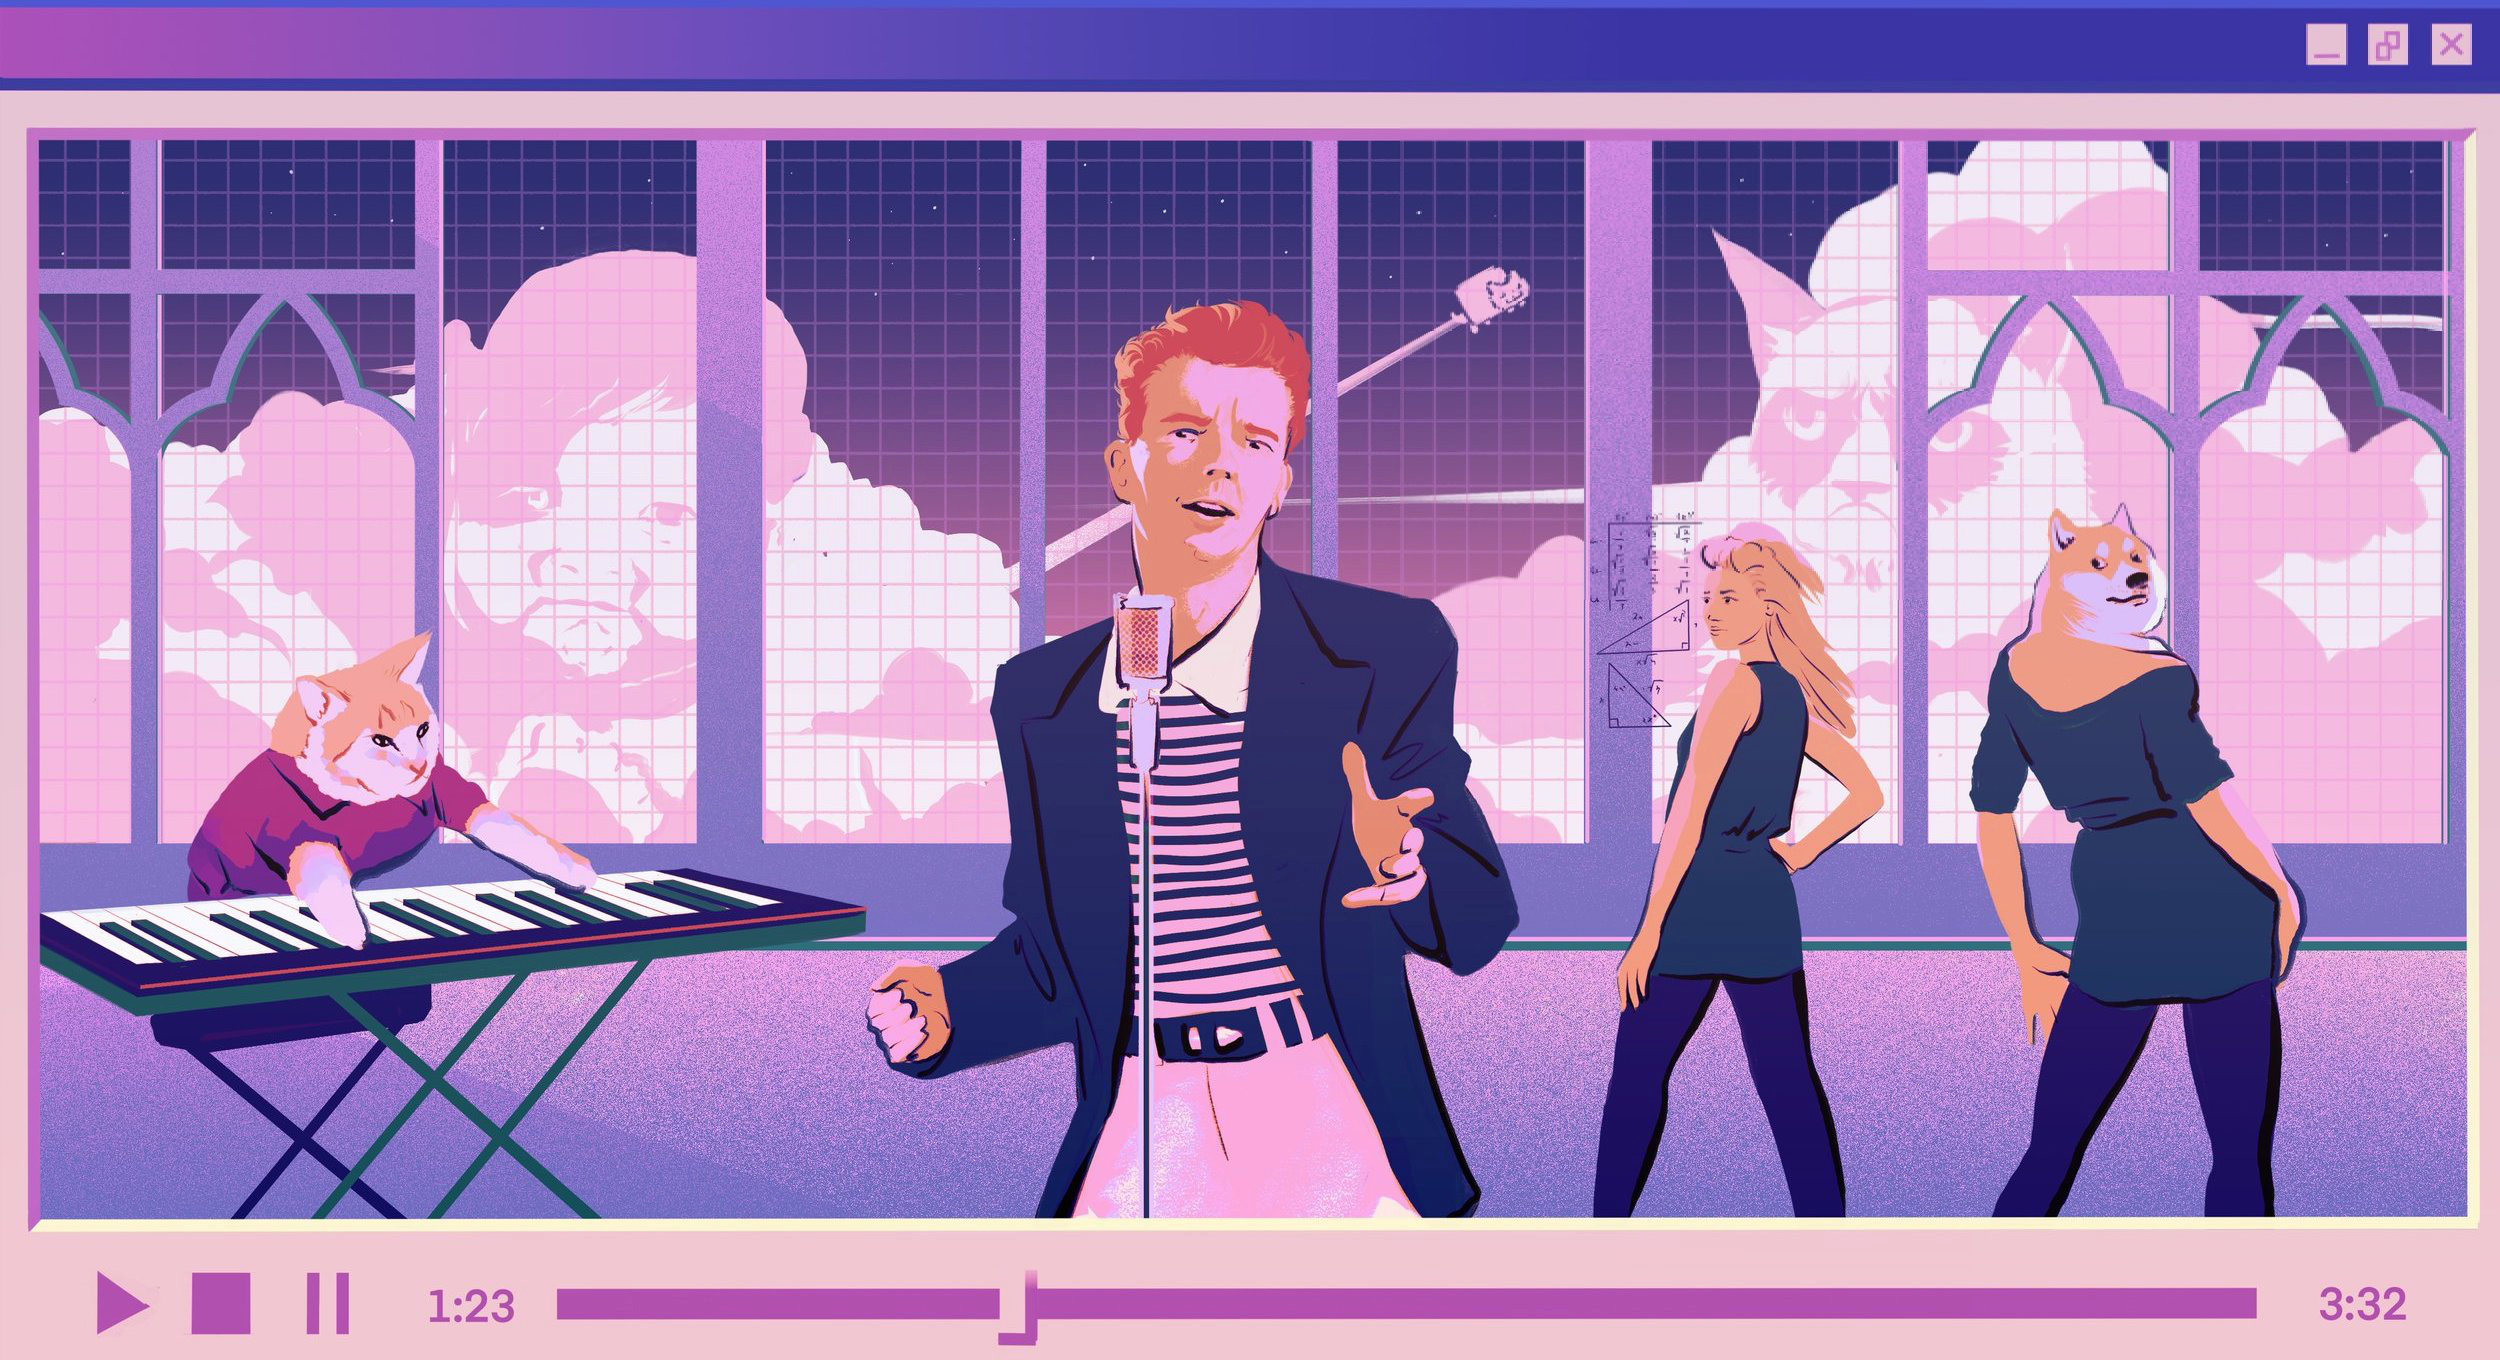

In [2]:
# Display our precious image.
Image(filename='test_1.png') #Oh, no! It's blank!

Here's what was the troll did. Can you undo it?

In [3]:
#read original image and check shape
orgnl_img = cv2.imread('test_1.png',1)
orgnl_img.shape

(1360, 2500, 3)

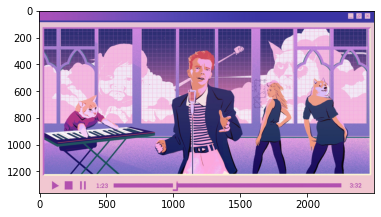

In [4]:
#convert original image to rgb
rgb_img = cv2.cvtColor(orgnl_img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)

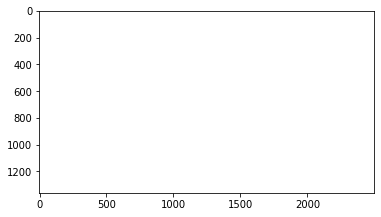

In [5]:
"""overwrote the original image with ones, 
so now the only copy is the one he/she (women can be trolls too :p) 
was working on"""

new_img = np.ones(rgb_img.shape)
cv2.imwrite("our_precious_image.jpeg", new_img)
plt.imshow(new_img) #displays the now blank image, and laughs in the key of f :D

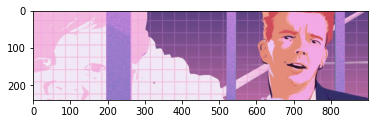

In [6]:
#split the image into sections
section1 = rgb_img[0:360, 0:1400]
section2 = rgb_img[0:600, 1400:2500]
section3 = rgb_img[360:1360, 0:500]
section4 = rgb_img[360:600, 500:1400]
section5 = rgb_img[600:1360, 500:2000]
section6 = rgb_img[600:1360, 2000:2500]
plt.imshow(section4)

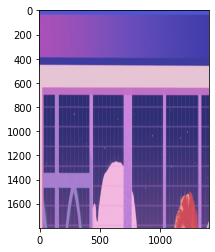

In [7]:
#mess up section1
section1_new = cv2.resize(section1,None,fx=1, fy=5)
plt.imshow(section1_new)
#plt.imshow(section1)

In [8]:
#mess up section2
desired_width = 550
desired_height = 580
dim = (desired_width, desired_height)

section2_new = cv2.resize(section2, dsize=dim, interpolation=cv2.INTER_AREA)
# plt.imshow(section2_new)

In [9]:
#mess up section3
r3,g3,b3 = cv2.split(section3)
section3_new = cv2.merge((g3,b3,r3))
# imgMerged_RGB = cv2.cvtColor(section3_new, cv2.COLOR_BGR2RGB)
# plt.imshow(imgMerged_RGB);plt.title("Merged Output");

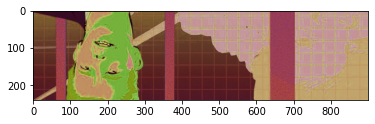

In [10]:
#mess up section4
#really went out of their way to mess this one up; maybe they didn't like the face 🤷🏽‍♂️
section4_interim1 = cv2.flip(section4, -1)

section4_interim2 = cv2.cvtColor(section4_interim1, cv2.COLOR_RGB2HSV)
h4,s4,v4 = cv2.split(section4_interim2)
h4_new = h4+40
s4_new = s4+50
v4_new = v4-50
section4_interim3 = cv2.merge((h4_new,s4_new,v4_new))
section4_new = cv2.cvtColor(section4_interim3, cv2.COLOR_HSV2RGB)

plt.imshow(section4_new)

In [11]:
#mess up section5
section5_new = cv2.cvtColor(section5, cv2.COLOR_BGR2HSV)
# plt.imshow(section5_new)

In [12]:
#mess up section6
r6,g6,b6 = cv2.split(section6)
blank = np.zeros(section6.shape[:2], dtype='uint8')
red6 = cv2.merge([r6,blank,blank])
green6 = cv2.merge([blank,g6,blank])
blue6 = cv2.merge([blank,blank,b6])

section6_new_1 = red6
section6_new_2 = green6
section6_new_3 = blue6

# plt.figure(figsize=[20,5])
# plt.subplot(141);plt.imshow(red6);plt.title("Red Channel");
# plt.subplot(142);plt.imshow(green6);plt.title("Green Channel");
# plt.subplot(143);plt.imshow(blue6);plt.title("Blue Channel");
# section6_merged = cv2.merge((r6,g6,b6))
# plt.subplot(144);plt.imshow(section6_merged);plt.title("Merged Output");

In [13]:
#save out mutilated sections of the images to torture victims
cv2.imwrite("section1.png", section1_new)
cv2.imwrite("section2.png", section2_new)
cv2.imwrite("section3.png", section3_new)
cv2.imwrite("section4.png", section4_new)
cv2.imwrite("section5.png", section5_new)
cv2.imwrite("section6_1.png", section6_new_1)
cv2.imwrite("section6_2.png", section6_new_2)
cv2.imwrite("section6_3.png", section6_new_3)


True

In [14]:
section1_orig = cv2.imread("section1.png")
section2_orig = cv2.imread("section2.png")
section3_orig = cv2.imread("section3.png")
section4_orig = cv2.imread("section4.png")
section5_orig = cv2.imread("section5.png")
section6_1_orig = cv2.imread("section6_1.png")
section6_2_orig = cv2.imread("section6_2.png")
section6_3_orig = cv2.imread("section6_3.png")

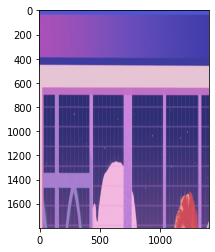

In [15]:
plt.imshow(section1_orig)

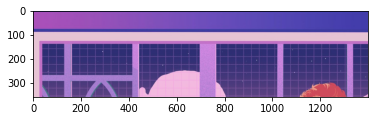

In [16]:
section1_fix = cv2.resize(section1_orig,None,fx=1, fy=0.2)
plt.imshow(section1_fix)

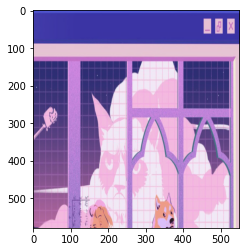

In [17]:
plt.imshow(section2_orig)

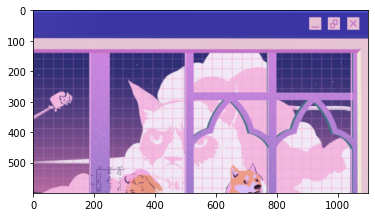

In [18]:
desired_width = 1100
desired_height = 600
dim = (desired_width, desired_height)

section2_fix = cv2.resize(section2_orig, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(section2_fix)

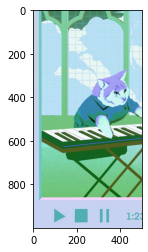

In [19]:
plt.imshow(section3_orig)

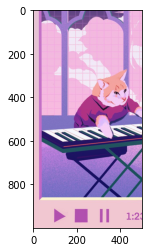

In [20]:
g3,b3,r3 = cv2.split(section3_orig)
section3_fix = cv2.merge((r3,g3,b3))
plt.imshow(section3_fix)

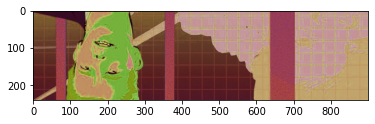

In [21]:
plt.imshow(section4_orig)

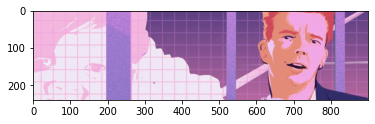

In [22]:
section4_fix_i3 = cv2.cvtColor(section4_orig, cv2.COLOR_RGB2HSV)
h4,s4,v4 = cv2.split(section4_fix_i3)
Dh = -40; Ds = -50; Dv = 50
h4_fix = np.mod(h4 + Dh, 180).astype(np.uint8) #Hue is a special boy range[0-179]
s4_fix = np.mod(s4 + Ds, 256).astype(np.uint8)
v4_fix = np.mod(v4 + Dv, 256).astype(np.uint8)
section4_fix_i2 = cv2.merge((h4_fix,s4_fix,v4_fix))
section4_fix_i1 = cv2.cvtColor(section4_fix_i2, cv2.COLOR_HSV2RGB)
section4_fix = cv2.flip(section4_fix_i1, -1)

plt.imshow(section4_fix)

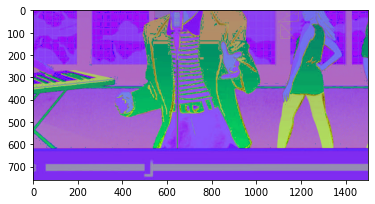

In [23]:
plt.imshow(section5_orig)

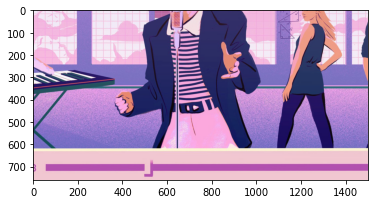

In [24]:
section5_fix = cv2.cvtColor(section5_orig, cv2.COLOR_HSV2BGR)
plt.imshow(section5_fix)

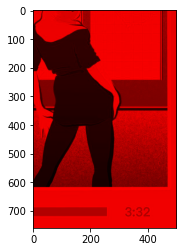

In [25]:
plt.imshow(section6_1_orig)

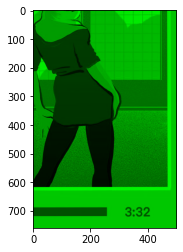

In [26]:
plt.imshow(section6_2_orig)

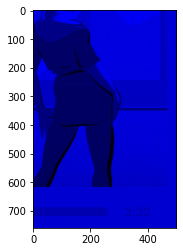

In [27]:
plt.imshow(section6_3_orig)

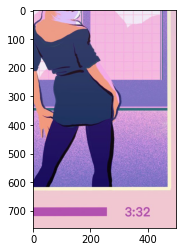

In [28]:
section6_fix = cv2.merge([section6_1_orig[:,:,0], section6_2_orig[:,:,1], section6_3_orig[:,:,2]])
plt.imshow(section6_fix)

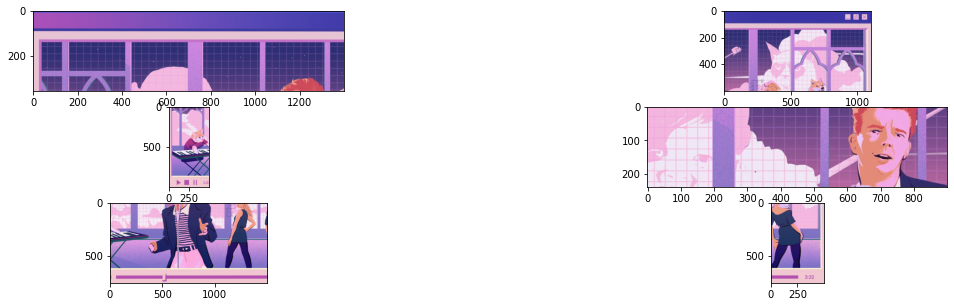

In [29]:
plt.figure(figsize=[20,5])
plt.subplot(321);plt.imshow(section1_fix)
plt.subplot(322);plt.imshow(section2_fix)
plt.subplot(323);plt.imshow(section3_fix)
plt.subplot(324);plt.imshow(section4_fix)
plt.subplot(325);plt.imshow(section5_fix)
plt.subplot(326);plt.imshow(section6_fix)

In [30]:
rgb_img[0:360, 0:1400] = section1_fix
rgb_img[0:600, 1400:2500] = section2_fix
rgb_img[360:1360, 0:500] = section3_fix
rgb_img[360:600, 500:1400] = section4_fix
rgb_img[600:1360, 500:2000] = section5_fix
rgb_img[600:1360, 2000:2500] = section6_fix

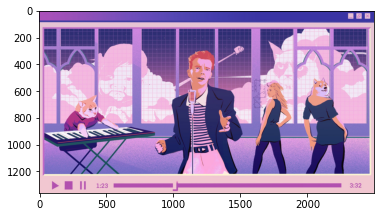

In [31]:
plt.imshow(rgb_img)